In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['DFKai-sb'] 
plt.rcParams['axes.unicode_minus'] = False
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/winequality.csv",sep=";")
q = {3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1}
df['quality'] = df['quality'].map(q)

In [3]:
#df.head()

In [4]:
#df.columns

In [5]:
#df.info()

In [6]:
#df.groupby(['quality']).size()

In [7]:
#df['quality'].value_counts(normalize=True)

In [8]:
#plt.figure(figsize=(20,10))
#sns.heatmap(df.corr(), annot=True);

In [9]:
#df.corr()['quality']

In [10]:
X_cols = df.columns.drop('quality')
X = df[X_cols]
y = df['quality']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=5)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    model_pl.fit(X_train, y_train)
    score = model_pl.score(X_test, y_test)
    scores[model.__class__.__name__] = score
scores

{'DecisionTreeClassifier': 0.7307692307692307,
 'KNeighborsClassifier': 0.7484615384615385,
 'LogisticRegression': 0.7338461538461538,
 'SVC': 0.7738461538461539}

In [12]:
pd.Series(scores).sort_values(ascending=False)

SVC                       0.773846
KNeighborsClassifier      0.748462
LogisticRegression        0.733846
DecisionTreeClassifier    0.730769
dtype: float64

In [13]:
from sklearn.model_selection import KFold
data = np.arange(10,18)
kfold = KFold(n_splits=4)
for train_idx, test_idx in kfold.split(data):
    print(f'訓練集資料: {data[train_idx]}， 測試集資料:{data[test_idx]}')

訓練集資料: [12 13 14 15 16 17]， 測試集資料:[10 11]
訓練集資料: [10 11 14 15 16 17]， 測試集資料:[12 13]
訓練集資料: [10 11 12 13 16 17]， 測試集資料:[14 15]
訓練集資料: [10 11 12 13 14 15]， 測試集資料:[16 17]


In [14]:
kfold = KFold(n_splits=5)
model_pl_lr = make_pipeline(StandardScaler(), SVC())
scores = []
for train_idx, test_idx in kfold.split(X_train, y_train):
    model_pl_lr.fit(X_train.iloc[train_idx], y_train.iloc[train_idx])
    scores.append(model_pl_lr.score(X_train.iloc[test_idx], y_train.iloc[test_idx]))
print(f'5折交叉驗證的結果{np.mean(scores)}')

5折交叉驗證的結果0.7698687717479825


In [15]:
from sklearn.model_selection import cross_val_score
model_pl_lr = make_pipeline(StandardScaler(), SVC())
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='accuracy', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.75096154 0.78653846 0.77478345 0.7680462  0.77285852]
5折交叉驗證的平均結果0.7706376323387873


In [16]:
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='precision', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.77154583 0.81027104 0.80142857 0.79349364 0.79745042]
5折交叉驗證的平均結果0.794837900087679


In [17]:
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='recall', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.8597561  0.86453577 0.85518293 0.85518293 0.85823171]
5折交叉驗證的平均結果0.8585778854363888


In [18]:
scores = cross_val_score(model_pl_lr, X_train, y_train, scoring='f1', cv=5)
print(f'5折交叉驗證的每次結果 {scores}')
print(f'5折交叉驗證的平均結果{np.mean(scores)}')

5折交叉驗證的每次結果 [0.81326604 0.8365243  0.82743363 0.82318415 0.8267254 ]
5折交叉驗證的平均結果0.825426705399949


In [19]:
models = [LogisticRegression(), SVC(), KNeighborsClassifier(), DecisionTreeClassifier(max_depth=10)]
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='accuracy', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

SVC                       0.775636
KNeighborsClassifier      0.763131
DecisionTreeClassifier    0.759664
LogisticRegression        0.739274
dtype: float64

In [20]:
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='precision', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

SVC                       0.799063
DecisionTreeClassifier    0.795962
KNeighborsClassifier      0.795879
LogisticRegression        0.770515
dtype: float64

In [21]:
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='recall', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

SVC                       0.861932
KNeighborsClassifier      0.840896
LogisticRegression        0.836322
DecisionTreeClassifier    0.834499
dtype: float64

In [22]:
scores = {}
for model in models:
    model_pl = make_pipeline(StandardScaler(), model)
    score = cross_val_score(model_pl, X_train, y_train, scoring='f1', cv=10)
    scores[model.__class__.__name__] = score.mean()
pd.Series(scores).sort_values(ascending=False)

SVC                       0.829166
KNeighborsClassifier      0.817595
DecisionTreeClassifier    0.815141
LogisticRegression        0.801989
dtype: float64

In [23]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model_pl_lr = make_pipeline(StandardScaler(), LogisticRegression())
model_pl_lr.fit(X_train, y_train)
y_pred = model_pl_lr.predict(X_test)
print('正確率：', accuracy_score(y_test, y_pred).round(3))
print('混亂矩陣')
print(confusion_matrix(y_test, y_pred))
print('綜合報告')
print(classification_report(y_test, y_pred))

正確率： 0.734
混亂矩陣
[[254 214]
 [132 700]]
綜合報告
              precision    recall  f1-score   support

           0       0.66      0.54      0.59       468
           1       0.77      0.84      0.80       832

    accuracy                           0.73      1300
   macro avg       0.71      0.69      0.70      1300
weighted avg       0.73      0.73      0.73      1300



In [24]:
model_tree = DecisionTreeClassifier(max_depth=10)
model_tree.fit(X_train, y_train)
pd.Series(model_tree.feature_importances_, index=X.columns).sort_values(ascending=False).head()

alcohol                 0.313981
volatile acidity        0.174345
total sulfur dioxide    0.076106
sulphates               0.073949
free sulfur dioxide     0.066640
dtype: float64

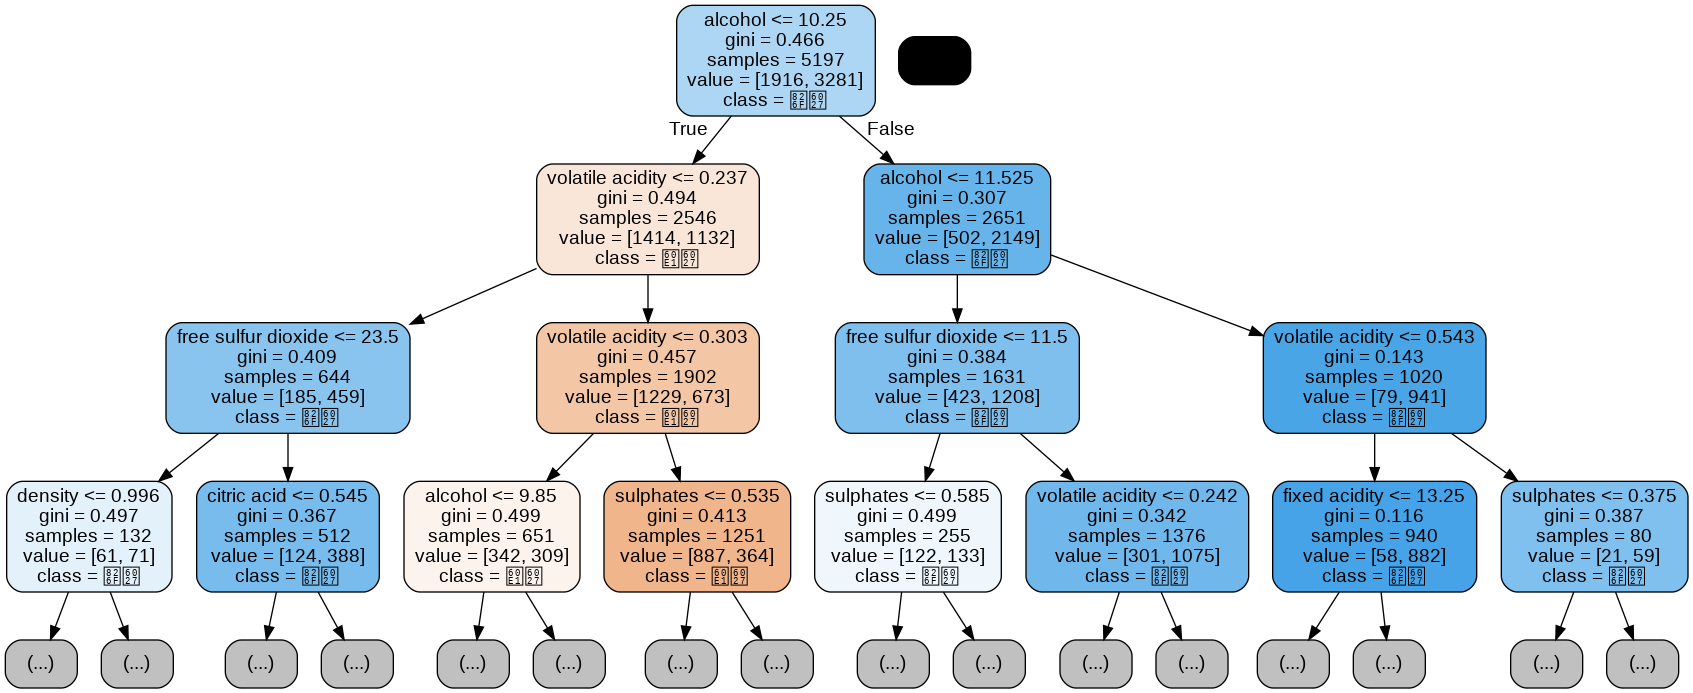

In [25]:
from sklearn.tree import export_graphviz
import pydot 
from IPython.display import Image  

features = X.columns
class_names = ['惡性', '良性']
dot_data = export_graphviz(model_tree, out_file=None,
                           feature_names=features,
                           class_names = class_names,
                           proportion = False,
                           max_depth=3,
                           filled=True,
                           rounded=True)

graph = pydot.graph_from_dot_data(dot_data)  
graph[0].write_png('tumor.png')
Image(graph[0].create_png(), width=800)